In [ ]:
# Import Data Manipulation Library
import numpy as np
import pandas as pd
# Import Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt
# Import Filter warning libraries
import warnings
warnings.filterwarnings('ignore')
# Import Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
filepath = r"insurance.csv"

df = pd.read_csv(filepath)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from collections import OrderedDict

stats = []

for i in df.select_dtypes(exclude='object'):
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[i] > (Q3 + 1.5 * IQR)) | (df[i] < (Q1 - 1.5 * IQR))][i].count()

    numerical_stats = OrderedDict({
        'Feature': i,
        'Count': df[i].count(),
        'Mean': df[i].mean(),
        'Std': df[i].std(),
        'Min': df[i].min(),
        '25%': Q1,
        '50%': df[i].median(),
        '75%': Q3,
        'Max': df[i].max(),
        'Skewness': df[i].skew(),
        'Kurtosis': df[i].kurtosis(),
        'IQR': IQR,
        'Outliers': outliers
    })

    stats.append(numerical_stats)

report = pd.DataFrame(stats)

report


,Feature,Count,Mean,Std,Min,25%,50%,75%,Max,Skewness,Kurtosis,IQR,Outliers
0,age,1338,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000,0.055673,-1.245088,24.000000,0
1,bmi,1338,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000,0.284047,-0.050732,8.397500,9
2,children,1338,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000,0.938380,0.202454,2.000000,0
3,charges,1338,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801,1.515880,1.606299,11899.625365,139


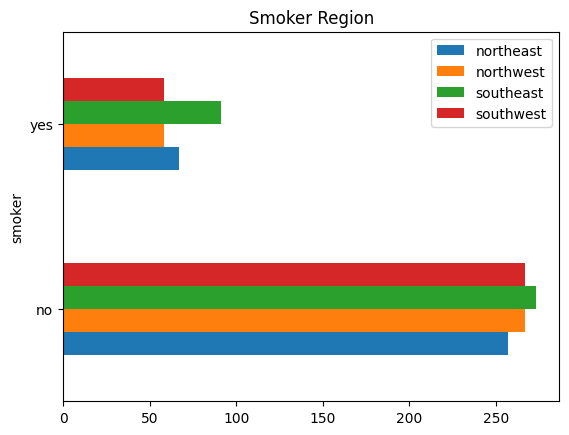

In [ ]:
smoker_region = pd.crosstab(df['smoker'], df['region'])
smoker_region.plot(kind = 'barh')
plt.legend(loc='upper right')
plt.title('Smoker Region')
plt.show()

<Figure size 600x900 with 0 Axes>

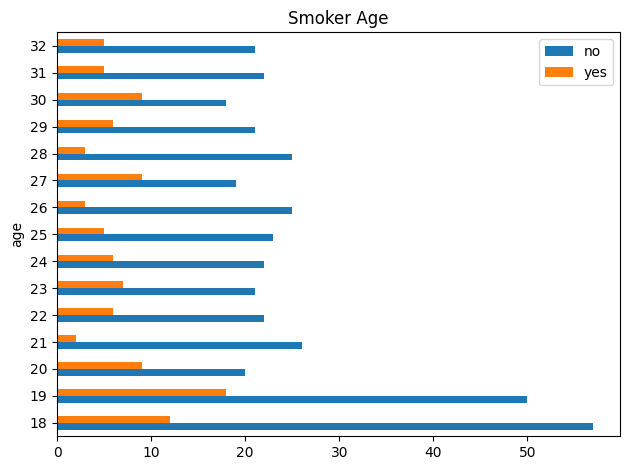

In [ ]:
plt.figure(figsize=(6, 9))
smoker_age = pd.crosstab(df['smoker'], df['age']).T.head(15)
smoker_age.plot(kind = 'barh')
plt.legend(loc='upper right')
plt.title('Smoker Age')
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=["charges"])
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
# Segregate Categorical and Numerical Columns

categorical_col = X.select_dtypes(include='object')
numerical_col = X.select_dtypes(exclude='object')

In [ ]:
# Data Preprocessing

numerical_transformer = RobustScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_col.columns),
        ('categorical', categorical_transformer, categorical_col.columns)
    ])

In [ ]:
preprocessor

ColumnTransformer(transformers=[('numerical', RobustScaler(),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [ ]:
# Define models
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('DecisionTree', DecisionTreeRegressor(random_state=42)),
    ('GradientBoosting', GradientBoostingRegressor(random_state=42)),
    ('Ridge', Ridge()),
    ('Lasso', Lasso())
]

# Fit & evaluate each model
for name, model in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)

    print(f"Model name : {name}")
    print(f"Regression Score [R2]:   {r2*100:.2f}%")


Model name : LinearRegression
Regression Score [R2]:   76.96%
Model name : RandomForest
Regression Score [R2]:   85.23%
Model name : DecisionTree
Regression Score [R2]:   73.41%
Model name : GradientBoosting
Regression Score [R2]:   86.74%
Model name : Ridge
Regression Score [R2]:   76.95%
Model name : Lasso
Regression Score [R2]:   76.96%
